In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, solve_ivp
from scipy.optimize import fsolve

# Constants
G = 6.6743e-11     # m^3 / kg / s^2
g0 = 9.81          # m / s^2
m_Earth = 5.972e24 # kg
m_Moon = 7.35e22   # kg
r_Earth = 6.3781e6 # meters
r_Moon = 1.7381e6  # meters
omega = 7.272e-5    # rad / s

## Part 1: The Ideal Case
___

In [2]:
# Length of the mine shaft
x0 = 4e3  # meters

# Calculating the free fall time and displaying the results
fft = np.sqrt(2 * x0 / g0)  # Simple free fall with no drag
print(f"(1) The simple free-fall time for a test object falling 4 km is {fft} seconds.")

(1) The simple free-fall time for a test object falling 4 km is 28.55686245854129 seconds.


(2) Differential equation for free-fall with drag: $\frac{d^2y}{dt^2} = -g + \alpha \mid \frac{dy}{dt} \mid^\gamma$

Using te fact that $\frac{dy}{dt} = v$,
the differential equation can be broken down to a system of coupled first order differential equations:
$$
\frac{dy}{dt} = v
$$
$$
\frac{dv}{dt} = -g + \alpha \mid v \mid^\gamma
$$

(4) According to the differential equation, the test mass reach the bottom in 28.556862458541303 seconds.
This is very similar to the time given by the simple free-fall equation, which was 28.55686245854129 seconds.
The two time only differs by -1.42e-14 seconds.



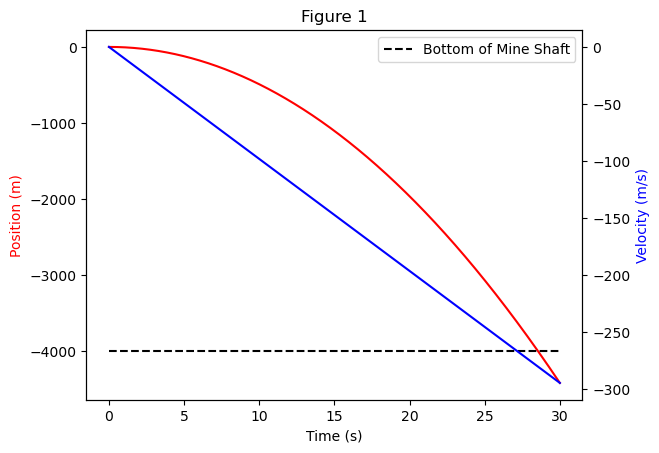

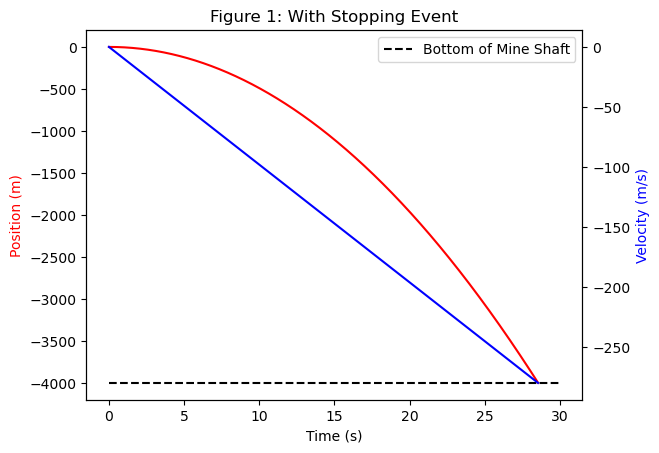

In [3]:
# Intializing drag variables and setting them to zero
alpha = 0
gamma = 0

# Free-Fall equations
def free_fall(t, s):
    y, v = s
    dydt = v
    dvdt = -g0 + alpha * np.abs(v)**gamma
    return dydt, dvdt

# Time span
t0, tf = 0, 30

# Initial conditions
y0, v0 = 0, 0

# Time evaluated
time = np.linspace(t0, tf, 3000)

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall, t_span = (t0, tf), y0 = [y0, v0], t_eval = time)
# Storing results of calculation into variables
x_time = soln.t
position = soln.y[0]
velocity = soln.y[1]

# (3) Plottinf results
fig, ax_ff_p = plt.subplots(1, 1)
# Plotting the position as a function of time
ax_ff_p.plot(x_time, position, color = 'red')
ax_ff_p.set_xlabel("Time (s)")
ax_ff_p.set_ylabel("Position (m)", color = 'red')
ax_ff_p.set_title("Figure 1")

# Plotting the velocity as a function of time as a twin axis with the first plot
ax_ff_v = ax_ff_p.twinx()
ax_ff_v.plot(x_time, velocity, color = 'blue')
ax_ff_v.set_ylabel("Velocity (m/s)", color = 'blue')

# Plotting horizontal line representing the bottom of the mine shaft at 4 km
ax_ff_p.hlines(-4000, t0, tf, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft")
ax_ff_p.legend()

# Stopping fuction to detect when test mass reach bottom of mine shaft
def stop_shaft(t, y):
    return y[0] + 4000
stop_shaft.terminal = True

# Again solving the equation, but with an event to stop when the test mass reach the bottom of the mine shaft
soln = solve_ivp(fun = free_fall, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stop_shaft)
x_time = soln.t
position = soln.y[0]
velocity = soln.y[1]
# Variable for the time it take to reach the bottom of the mine shaft
bottom_time = soln.t_events[0][0]

# Re-Plotting the same plot as above, but with stopping event
fig, ax_ff_p = plt.subplots(1, 1)
# Plot of position as a function of time
ax_ff_p.plot(x_time, position, color = 'red')
ax_ff_p.set_xlabel("Time (s)")
ax_ff_p.set_ylabel("Position (m)", color = 'red')
ax_ff_p.set_title("Figure 1: With Stopping Event")

# Plot of velocity as a function of time
ax_ff_v = ax_ff_p.twinx()
ax_ff_v.plot(x_time, velocity, color = 'blue')
ax_ff_v.set_ylabel("Velocity (m/s)", color = 'blue')

# Horizontal line representing the bottom of the mine shaft at 4 km
ax_ff_p.hlines(-4000, t0, tf, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft")
ax_ff_p.legend();

# Printing the time it take for the test mass to reach the bottom of the mine shaft
print(f"""(4) According to the differential equation, the test mass reach the bottom in {bottom_time} seconds.
This is very similar to the time given by the simple free-fall equation, which was {fft} seconds.
The two time only differs by {(fft - bottom_time):.2e} seconds.\n""")

## Part 2: Including Drag and a Variable g
___

(2) The test mass reach the bottom in 28.555370224692485 seconds with varying g. Differencing only by 0.0014922338488183584 seconds with no varying g.
By having a varying g, it takes longer for the test mass to reach the bottom of the mine shaft. This maks sense because as the mass get closer
to the center of the center of the Earth, the main acceleration for the free-fall g is getting weaker, so it would take longer to reach the bottom.

(3) Assuming the test mass has a terminal velocity of 50 m/s and the drag exponent being 2, the air resistance coeffiecient would need to be 2.
By introducing the drag variables, the free-fall time is longer for the test mass to reach the bottom of the mine shaft, since the velocity cap.
By introducing drag, the free-fall time is 83.28456708501885 seconds.



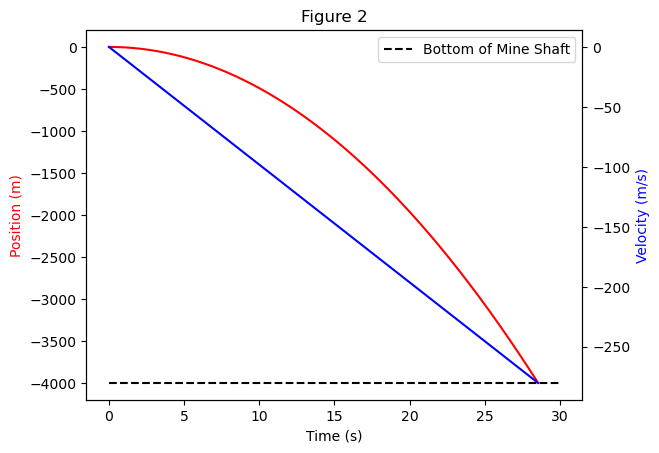

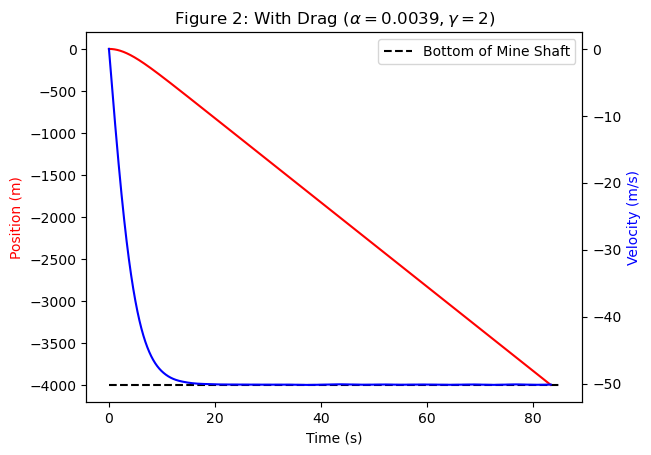

In [4]:
# (1) Defining function to calculate gravity as a function of radius
def g_r(r):
    return g0 * (r / r_Earth)

# Drag force variables (Still no drag)
alpha = 0
gamma = 0

# Free-Fall function but with gravity function
def free_fall_g(t, s):
    y, v = s
    dydt = v
    dvdt = -g_r(r_Earth - y) + alpha * np.abs(v)**gamma
    return dydt, dvdt
    
# Time span
t0, tf = 0, 30

# Initial conditions
y0, v0 = 0, 0

# Time evaluated
time = np.linspace(t0, tf, 3000)

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall_g, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stop_shaft)
x_time = soln.t
position = soln.y[0]
velocity = soln.y[1]
bottom_time2 = soln.t_events[0][0]

# Printing the time is take for the test mass to reach the bottom of the mine shaft with varying g
print(f"""(2) The test mass reach the bottom in {bottom_time2} seconds with varying g. Differencing only by {(bottom_time - bottom_time2)} seconds with no varying g.
By having a varying g, it takes longer for the test mass to reach the bottom of the mine shaft. This maks sense because as the mass get closer
to the center of the center of the Earth, the main acceleration for the free-fall g is getting weaker, so it would take longer to reach the bottom.\n""")

# Plotting the results
# Plot of position as a function of time
fig, ax_ff_p = plt.subplots(1, 1)
ax_ff_p.plot(x_time, position, color = 'red')
ax_ff_p.set_xlabel("Time (s)")
ax_ff_p.set_ylabel("Position (m)", color = 'red')
ax_ff_p.set_title("Figure 2")

# Plot of velocity as a function of time
ax_ff_v = ax_ff_p.twinx()
ax_ff_v.plot(x_time, velocity, color = 'blue')
ax_ff_v.set_ylabel("Velocity (m/s)", color = 'blue')

# Horizontal line representing the bottom of the mine shaft at 4 km
ax_ff_p.hlines(-4000, t0, tf, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft");
ax_ff_p.legend()

# (3) Now adding drag
# Setting values to drag force variables
alpha = 0.0039    # alpha value found for a terminal velocity of 50 m/s
gamma = 2

# Time span
t0, tf = 0, 85

# Initial conditions
y0, v0 = 0, 0

# Time evaluated
time = np.linspace(t0, tf, 8500)

# Solving again with 'solve_ivp'
soln = solve_ivp(fun = free_fall_g, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stop_shaft)
x_time = soln.t
position = soln.y[0]
velocity = soln.y[1]

# Plotting results with drag
fig, ax_ff_drag_p = plt.subplots(1, 1)
# Plot of velocity as a function of time
ax_ff_drag_p.plot(x_time, position, color = 'red')
ax_ff_drag_p.set_xlabel("Time (s)")
ax_ff_drag_p.set_ylabel("Position (m)", color = 'red')
ax_ff_drag_p.set_title(r"Figure 2: With Drag $(\alpha = 0.0039, \gamma = 2)$")

# Plot of velocity as a function of time
ax_ff_drag_v = ax_ff_drag_p.twinx()
ax_ff_drag_v.plot(x_time, velocity, color = 'blue')
ax_ff_drag_v.set_ylabel("Velocity (m/s)", color = 'blue')

# Horizontal line representing the bottom of the mine shaft at 4 km
ax_ff_drag_p.hlines(-4000, t0, tf, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft");
ax_ff_drag_p.legend();

print(f"""(3) Assuming the test mass has a terminal velocity of 50 m/s and the drag exponent being 2, the air resistance coeffiecient would need to be 2.
By introducing the drag variables, the free-fall time is longer for the test mass to reach the bottom of the mine shaft, since the velocity cap.
By introducing drag, the free-fall time is {soln.t_events[0][0]} seconds.\n""")

## Part 3: The Coriolis Force
___

Free-Fall System of Coupled First Order Equations, but with Coriolis Force:
$$
\frac{dy_x}{dt} = v_x
$$
$$
\frac{dv_x}{dt} = \frac{F_{c,x}}{m}
$$

$$
\frac{dy_y}{dt} = v_y
$$
$$
\frac{dv_y}{dt} = -g + \alpha \mid v \mid^\gamma + \frac{F_{c,y}}{m}
$$

Where $F_{c,x} = +2m\Omega v_y$ and $F_{c,x} = -2m\Omega v_x$.

The x component represent the transverse motion of the mass (side-to-side motion), while the y component represent the vertical motion (depth).

(3) If the mine shaft is 5 meters wide, the test mass bump into the wall first before reaching the bottom.
The test mass bumps into the wall at 27.6014178650888 seconds and depth of -3736.8102339096367 meters.

(4) By adding drag, the test mass bump into the side much sooner than reaching the bottom of the mine shaft.



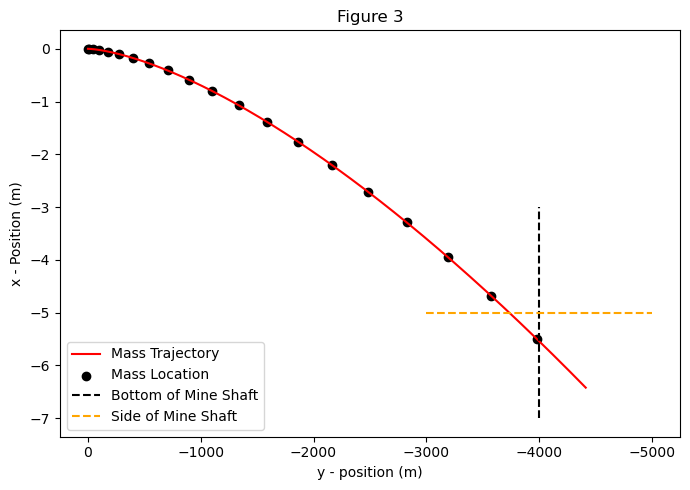

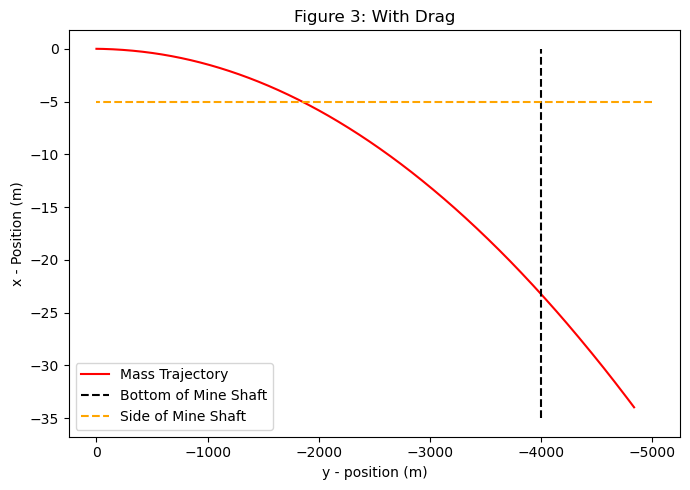

In [5]:
# Initializing variables
m = 1   # kg
# Drag variables
alpha = 0
gamma = 0

# Function for the coriolis force
def coriolis_force(v_x, v_y):
    f_cx = 2 * m * omega * v_y
    f_cy = -2 * m * omega * v_x
    return f_cx, f_cy

# Free-fall function, but with varying g and coriolos force
def free_fall_Fc(t, z):
    # Initializing the various components for both position and velocity
    pos_y, vel_y, pos_x, vel_x = z
    Fc_x, Fc_y = coriolis_force(vel_x, vel_y)
    # First order equations and their components
    dydt_y = vel_y
    dvdt_y = -g_r(pos_y) + alpha * np.abs(vel_y)**gamma + Fc_y / m
    dydt_x = vel_x
    dvdt_x = Fc_x / m
    return [dydt_y, dvdt_y, dydt_x, dvdt_x]

# Time span
t0, tf = 0, 30

# Initial conditions
y0_x, y0_y, v0_x, v0_y = 0, r_Earth, 0, 0

# Time evaluated
time = np.linspace(t0, tf, 10000)

# Stopping function to detect when the mass hit the side of the mine shaft
def stop_side(t, pos_x):
    return pos_x[2] + 5
stop_side.termianl = True

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall_Fc, t_span = (t0, tf), y0 = [y0_y, v0_y, y0_x, v0_x], t_eval = time, events = stop_side, rtol = 1E-9, atol = 1E-12)
x_time = soln.t
position_y = soln.y[0] - r_Earth
velocity_y = soln.y[1]
position_x = soln.y[2]
velocity_x = soln.y[3]

# Splicing the arrays
sub_x_time = x_time[0:-1:500]
sub_position_y = position_y[0:-1:500]
sub_velocity_y = velocity_y[0:-1:500]
sub_position_x = position_x[0:-1:500]
sub_velocity_x = velocity_x[0:-1:500]

# Plotting the results of the calculation
# Plot of position in both x and y directions
fig, ax_ff_c = plt.subplots(1, 1, figsize = (7, 5))
ax_ff_c.plot(position_y, position_x, color = 'red', label = 'Mass Trajectory')
ax_ff_c.invert_xaxis()
ax_ff_c.set_xlabel("y - position (m)")
ax_ff_c.set_ylabel("x - Position (m)")
ax_ff_c.set_title("Figure 3")
# Plotting a couple of points to show the mass move over time
ax_ff_c.scatter(sub_position_y, sub_position_x, marker = 'o', color = 'black', label = "Mass Location")
# Vertical line representing the bottom of the mine shaft (4 km)
ax_ff_c.vlines(-4000, -7, -3, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft")
# Horizontal line representing the side of the mine shaft (5 m)
ax_ff_c.hlines(-5, -3000, -5000, linestyle = '--', color = 'orange', label = "Side of Mine Shaft")
ax_ff_c.legend(loc = 'lower left')
fig.tight_layout()

# Using 'for' loop to find the y position at the time when the mass bumps into the wall
for i in range(len(x_time)):
    if x_time[i] >= soln.t_events[0][0]:
        depth = position_y[i]
        break

print(f"""(3) If the mine shaft is 5 meters wide, the test mass bump into the wall first before reaching the bottom.""")
print(f"The test mass bumps into the wall at {soln.t_events[0][0]} seconds and depth of {depth} meters.\n")

# Turning on drag
alpha = 0.0039
gamma = 2

# Time span
t0, tf = 0, 100

# Initial conditions
y0_x, y0_y, v0_x, v0_y = 0, r_Earth, 0, 0

# Time evaluated
time = np.linspace(t0, tf, 10000)

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall_Fc, t_span = (t0, tf), y0 = [y0_y, v0_y, y0_x, v0_x], t_eval = time, events = stop_side)
x_time = soln.t
position_y = soln.y[0] - r_Earth
position_x = soln.y[2]

# Plotting results
# Plot of position in both x and y directions
fig, ax_ff_c = plt.subplots(1, 1, figsize = (7, 5))
ax_ff_c.plot(position_y, position_x, color = 'red', label = 'Mass Trajectory')
ax_ff_c.invert_xaxis()
ax_ff_c.set_xlabel("y - position (m)")
ax_ff_c.set_ylabel("x - Position (m)")
ax_ff_c.set_title("Figure 3: With Drag")
# Vertical line representing the bottom of the mine shaft (4 km)
ax_ff_c.vlines(-4000, -35, 0, linestyle = '--', color = 'black', label = "Bottom of Mine Shaft")
# Horizontal line representing the side of the mine shaft (5 m)
ax_ff_c.hlines(-5, -5000, 0, linestyle = '--', color = 'orange', label = "Side of Mine Shaft")
ax_ff_c.legend(loc = 'lower left')
fig.tight_layout()

print("""(4) By adding drag, the test mass bump into the side much sooner than reaching the bottom of the mine shaft.\n""")

## Part 4: An Infinitely Deep Mine
___

(1) The position as a function of time line looks like a cosine function while the velocity as a function of time looks like a sine function.
So there is an oscialltion for both position and velocity as there is a sign change in the position.

(2) The test mass pass through the entire Earth in 2419.023637244518 seconds.
The test mass reach the center of the Earth in 1266.5753611491434 seconds with a speed of 7910.067049572932 m/s.

(3) The orbital velocity of the test mass at the surface of the Earth is 7905.277129890415 m/s. So the orbital period is 5069.371199675785 seconds.
The orbital period is greater than the crossing time by 2650.347562431267 m/s.



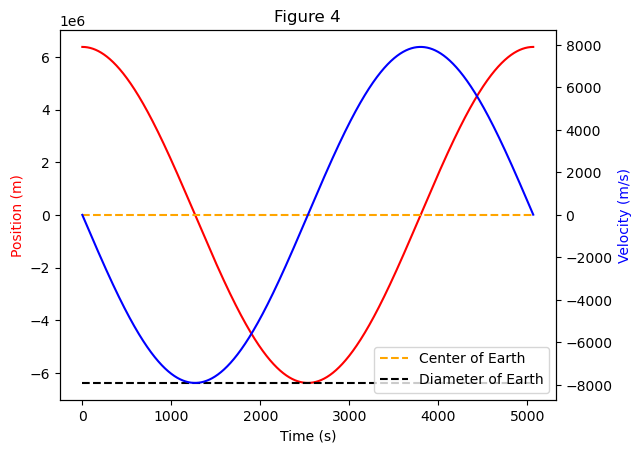

In [6]:
# No drag force
alpha = 0
gamma = 0

# Free-Fall function
def free_fall_earth(t, s):
    y, v = s
    dydt = v
    dvdt = -g_r(y) + alpha * np.abs(v)**gamma
    return dydt, dvdt

# Time span, but increased to give more time for the test mass to pass through Earth
t0, tf = 0, 5065

# Initial conditions
y0, v0 = r_Earth, 0

# Time evaluated
time = np.linspace(t0, tf, 50650)

# Stopping fuction to detect when the test mass reach diameter of Earth
def stop_earth(t, y):
    return y[0] + r_Earth*.99
stop_earth.terminal = False

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall_earth, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stop_earth, rtol = 1E-9)
x_time = soln.t
position = soln.y[0]
velocity = soln.y[1]
Earth_time = soln.t_events[0][0]

# Plotting results
fig, ax_ff_earth_p = plt.subplots(1, 1)
# Plot of position as a function of time
ax_ff_earth_p.plot(x_time, position, color = 'red')
ax_ff_earth_p.set_xlabel("Time (s)")
ax_ff_earth_p.set_ylabel("Position (m)", color = 'red')
ax_ff_earth_p.set_title("Figure 4")

# Plot of velocity as a function of time
ax_ff_earth_v = ax_ff_earth_p.twinx()
ax_ff_earth_v.plot(x_time, velocity, color = 'blue')
ax_ff_earth_v.set_ylabel("Velocity (m/s)", color = 'blue')

# Horizontal lines representing the center and diameter of the Earth
ax_ff_earth_p.hlines(0, t0, tf, linestyle = '--', color = 'orange', label = "Center of Earth")
ax_ff_earth_p.hlines(-r_Earth, t0, tf, linestyle = '--', color = 'black', label = "Diameter of Earth")
ax_ff_earth_p.legend(loc = 'lower right');

print("""(1) The position as a function of time line looks like a cosine function while the velocity as a function of time looks like a sine function.
So there is an oscialltion for both position and velocity as there is a sign change in the position.\n""")

# Printing the time it take for the test mass to pass through the entire Earth
print(f"(2) The test mass pass through the entire Earth in {Earth_time} seconds.")

# Defining new stopping function to detect when the test mass reach center of the Earth
def stop_center(t, y):
    return y[0]
stop_center.terminal = True

soln = solve_ivp(fun = free_fall_earth, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stop_center, rtol=1E-9)
center_time = soln.t_events[0][0]
center_time_velocity = np.abs(soln.y[1][-1])

#Calculating the orbital speed and period
orbital_speed = np.sqrt((G * m_Earth) / r_Earth)
orbital_period = (2 * np.pi * r_Earth) / orbital_speed

print(f"The test mass reach the center of the Earth in {center_time} seconds with a speed of {center_time_velocity} m/s.\n")

print(f"""(3) The orbital velocity of the test mass at the surface of the Earth is {orbital_speed} m/s. So the orbital period is {orbital_period} seconds.
The orbital period is greater than the crossing time by {orbital_period - Earth_time} m/s.\n""")

## Part 5: A Non-Uniform Earth
___

(4)
For n = 0, the test mass reach the center of the Earth in 1266.077821595091 seconds and with a velocity of 7905.267267369849 m/s.

For n = 1, the test mass reach the center of the Earth in 1095.5570837543976 seconds and with a velocity of 10457.677522800062 m/s.

For n = 2, the test mass reach the center of the Earth in 1034.2548295815725 seconds and with a velocity of 12182.81936280702 m/s.

For n = 9, the test mass reach the center of the Earth in 943.2330143557155 seconds and with a velocity of 18370.558802875676 m/s.



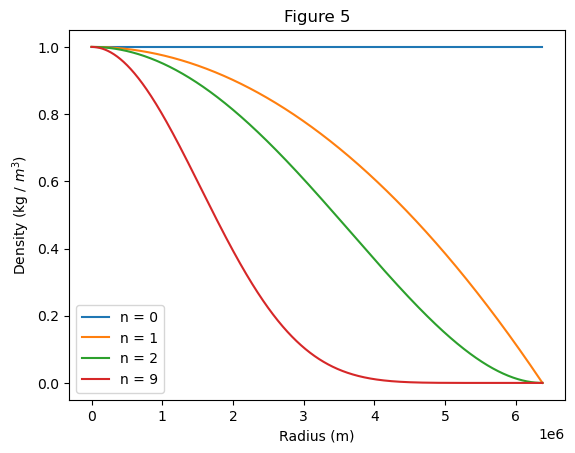

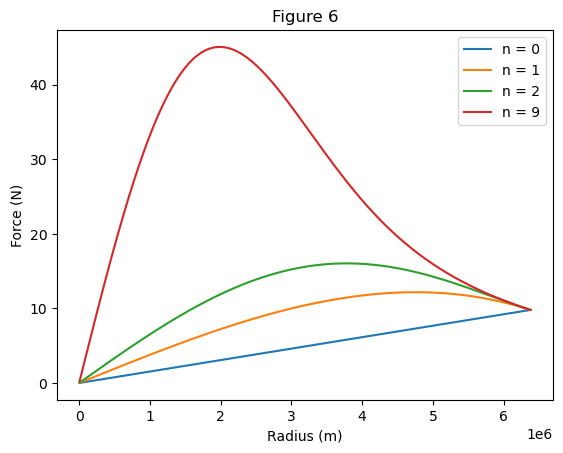

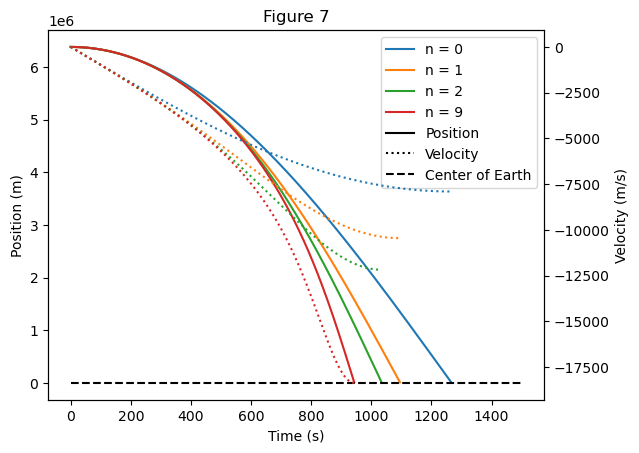

In [7]:
# (1) Density profile function
def density_profile(r, n, rho_n):
    return rho_n * (1 - (r**2 / r_Earth**2))**n

# Initializing variables for radii
N = 1000
r0 = 0
radii = np.linspace(r0, r_Earth, N)

# Calculating the density profile as a function of radius
density0 = density_profile(radii, 0, 1)
density1 = density_profile(radii, 1, 1)
density2 = density_profile(radii, 2, 1)
density9 = density_profile(radii, 9, 1)

# Plotting the density porfiles with different n values
fig, ax_density = plt.subplots(1, 1)
ax_density.plot(radii, density0, label = 'n = 0')
ax_density.plot(radii, density1, label = 'n = 1')
ax_density.plot(radii, density2, label = 'n = 2')
ax_density.plot(radii, density9, label = 'n = 9')
# Labeling the plot
ax_density.set_xlabel('Radius (m)')
ax_density.set_ylabel(r'Density (kg / $m^3$)')
ax_density.set_title("Figure 5")
ax_density.legend()

# Function for the integral to calculate the mass based on the density profile
def mass(r, n, rho_n):
    def mass_integral(x):
        return (4 * np.pi) * density_profile(x, n, rho_n) * x**2
    # Safety measure to return no value if the integral result is or close to zero
    if np.isclose(quad(mass_integral, r0, r)[0], 0):
        return np.nan
    else:
        return quad(mass_integral, r0, r)[0]

# The gravitational force that the test mass experience on the surface
# Since the test mass is 1 kg, I can ignore the second m of the equation
surface_force = G * m_Earth / r_Earth**2

# Initializing array to store found normalization factor rho
rho_n_values = {}

# 'for' loop to find the the normalization constant
for i in [0, 1, 2, 9]:
    # Function to calculate the suface force
    def find_rho_n(rho_n):
        surface_mass = mass(r_Earth, i, rho_n)
        return G * surface_mass / r_Earth**2 - surface_force
    
    # Using 'fsolve' to find the normalization constant by testing each value and seeing if is the same as the surface force
    rho_n_values[i] = fsolve(find_rho_n, 1)[0]

# Initializing array to store all force profile
force_profile = {}
# Using 'for loop' to calculate the force profile for each n values
for i in [0, 1, 2, 9]:
    # Initializing array to store force values
    force_profile[i] = []
    # Using another 'for' loop calculate the force at different radii
    for j in radii:
        r_mass = mass(j, i, rho_n_values[i])
        r_force = G * r_mass / j**2
        # Storing it a array
        force_profile[i].append(r_force)
    
# Initializing plots
fig, ax_force_profile = plt.subplots(1, 1)

# Using 'for' loop to plot the force as a function of radius
for i in [0, 1, 2, 9]:
    ax_force_profile.plot(radii, force_profile[i], label = f"n = {i}")

# Labeling the plot
ax_force_profile.set_xlabel("Radius (m)")
ax_force_profile.set_ylabel("Force (N)")
ax_force_profile.set_title("Figure 6")
ax_force_profile.legend()

# (3)
# Drag variable
alpha = 0
gamma = 0
# Mass of test mass
m = 1    # kg

# Free-Fall equation, but using the gravitational force
def free_fall_density(t, g):
    y, v = g
    dydt = v
    # Interpolating the force profile to get additional points
    force_y = np.interp(y, radii, force_profile[n])
    dvdt = - force_y / m
    return dydt, dvdt

# Time span
t0, tf = 0,1500

# Initial conditions
y0, v0 = r_Earth, 0

# Time evaluated
time = np.linspace(t0, tf, 150000)

# Stopping function to stop when test mass reach the center of the Earth
def stop_center(t, y):
    # Change the function so it doesn't have to exatly be zero
    # Taking the additional term will prevent event from being detected
    return y[0] - 10000
stop_center.terminal = True

# Initializing plots and twin axes
fig, ax_ff_density_p = plt.subplots(1, 1)
ax_ff_density_v = ax_ff_density_p.twinx()

print("(4)")

# Initializing array to store all calculations from 'solve_ivp'
soln = {}
x_time = {}
position = {}
velocity = {}

# Using 'for' loop to solve the function and plot the results while displaying the time it take to reach the center and velocity
for i in [0, 1, 2, 9]:
    n = i
    soln[i] = solve_ivp(fun = free_fall_density, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stop_center, rtol = 1E-9, atol = 1E-12)
    x_time[i] = soln[i].t
    position[i] = soln[i].y[0]
    velocity[i] = soln[i].y[1]
    # Displaying the time and velocity
    print(f"For n = {i}, the test mass reach the center of the Earth in {soln[i].t_events[0][0]} seconds and with a velocity of {np.abs(velocity[i][-1])} m/s.\n")
    # The position is plotted as a solid line, while the velocity is plotted as a dotted line
    ax_ff_density_p.plot(x_time[i], position[i], label = f"n = {i}")
    ax_ff_density_v.plot(x_time[i], velocity[i], linestyle = ':')

# Labeling the plot
ax_ff_density_p.plot(0, 0, color = 'black', label = "Position")
ax_ff_density_p.plot(0, 0, color = 'black', linestyle = ':', label = "Velocity")
ax_ff_density_p.set_xlabel("Time (s)")
ax_ff_density_p.set_ylabel("Position (m)")
ax_ff_density_p.set_title("Figure 7")
ax_ff_density_v.set_ylabel("Velocity (m/s)")

# Horizontal lines representing the center and diameter of the Earth
ax_ff_density_p.hlines(0, t0, tf, linestyle = '--', color = 'black', label = "Center of Earth")
ax_ff_density_p.legend();

## Part 6: A Lunar Mine Shaft
___

(1) The test mass reach the center of the Moon in 1625.1201867019768 seconds.

(2) Assuming constant density, the density of the Moon is 3341.7538038703183 kg per cubic meter.
Which is 0.6081591337511928 times the Earth's density. The Earth's density is 5494.8674095512 kg per cubic meter, assuming constant density.

(3) Free fall can depend on density by the gravitational force exterted on the mass. The density gives the mass distribution, which mass is proportional
to the gravitational force. Then according F=ma, the acceleartion can be found, thus finding the leading term that contribute most to the free-fall.



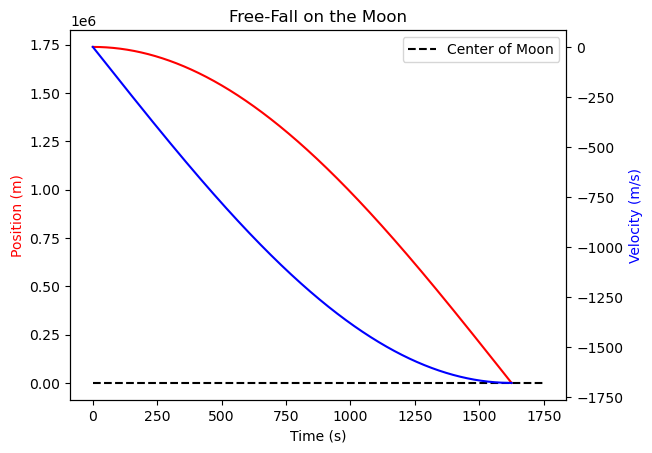

In [8]:
# Calculaing the surface gravity of the Moon
g0_Moon = (G * m_Moon) / r_Moon**2

# Setting drag variables to zero
alpha = 0
gamma = 0

# Defing the function for varying g for the Moon
def g_moon(r):
    return g0_Moon * (r / r_Moon)

# Free-fall function for the Moon
def free_fall_moon(t, p):
    y, v = p
    dydt = v
    dvdt = -g_moon(y) + alpha * np.abs(v)**gamma
    return dydt, dvdt

# Time span
t0, tf = 0, 1750

# Initial Conditions
y0, v0 = r_Moon, 0

# Time evaluated
time = np.linspace(t0, tf, 175000)

# Stopping function to stop when the test mass reach the center of the Moon
def stop_moon(t, y):
    return y[0]
stop_moon.terminal = True

# Solving with 'solve_ivp'
soln = solve_ivp(fun = free_fall_moon, t_span = (t0, tf), y0 = [y0, v0], t_eval = time, events = stop_moon, rtol = 1e-9)
x_time = soln.t
position = soln.y[0]
velocity = soln.y[1]
moon_center_time = soln.t_events[0][0]

# Printing the time is take for test mass to reach the center of the Moon
print(f"(1) The test mass reach the center of the Moon in {moon_center_time} seconds.\n")

# Calculating the density of the Moon and Earth by using mass / volume
moon_density = m_Moon / ((4 / 3) * np.pi * r_Moon**3)
earth_density = mass(r_Earth, 0, rho_n_values[0]) / ((4 / 3) * np.pi * r_Earth**3) # Using integral to find mass and dividing by Earth's volume

# Printing the volume of the Moon and how it compae to the Earth's density
print(f"""(2) Assuming constant density, the density of the Moon is {moon_density} kg per cubic meter.
Which is {moon_density / earth_density} times the Earth's density. The Earth's density is {earth_density} kg per cubic meter, assuming constant density.\n""")

print("""(3) Free fall can depend on density by the gravitational force exterted on the mass. The density gives the mass distribution, which mass is proportional
to the gravitational force. Then according F=ma, the acceleartion can be found, thus finding the leading term that contribute most to the free-fall.\n""")

# Plotting results
fig, ax_ff_moon_p = plt.subplots(1, 1)
# Plot of position as a function time
ax_ff_moon_p.plot(x_time, position, color = 'red')
ax_ff_moon_p.set_xlabel("Time (s)")
ax_ff_moon_p.set_ylabel("Position (m)", color = 'red')
ax_ff_moon_p.set_title("Free-Fall on the Moon")

# Plot of velocity as a function time
ax_ff_moon_v = ax_ff_moon_p.twinx()
ax_ff_moon_v.plot(x_time, velocity, color = 'blue')
ax_ff_moon_v.set_ylabel("Velocity (m/s)", color = 'blue')

# Horizontal line representing the center of the Moon
ax_ff_moon_p.hlines(0, t0, tf, linestyle = '--', color = 'black', label = "Center of Moon");
ax_ff_moon_p.legend();